In [3]:
#import bibliotek
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from math import sqrt
import math
import scipy.stats as stats
import statistics as st
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [4]:
#1) Zaimportować dane (dane po wcześniejszym przeskalowaniu)
dane = pd.read_excel(r'/content/autoskalowane.xlsx', sheet_name = 'Autoskalowane')
list_of_columns = []
for column in dane.columns:
    list_of_columns.append(column)


In [5]:
#1) Zaimportować dane (dane bez skalowania)
dane_bez_skal = pd.read_excel(r'/content/dane_do_analizy.xlsx', sheet_name = 'dane_trans')

In [6]:
cereals = dane['name']
dane.drop('name', inplace=True, axis=1)
dane = dane.set_axis([cereals])

def arithmetic_average(list_of_columns,dane):
    dict_mean = {}
    for element in list_of_columns[1:]:
        mean = dane[element].mean()
        dict_mean[element] = mean
        
    return dict_mean

#ŚREDNIA ARYTMETYCZNA
av = arithmetic_average(list_of_columns,dane)

In [7]:
mean_df = dane_bez_skal.mean(axis = 0)
std_df = dane_bez_skal.std(axis = 0)
df1 = []
i = 0
for dot in dane_bez_skal.columns[1:]:
  ascaled = (dane_bez_skal[dot]-mean_df[i]/std_df[i])
  i += 1
  df1.append(ascaled)

df2 = pd.concat(df1,axis=1)

X = df2.values
N,M = X.shape
covown = np.zeros((M,M))

for i in range(M):
  mean_i = np.sum(X[:,i])/N

  for j in range(M):
    mean_j = np.sum(X[:,j]) / N

    covown[i,j] = np.sum((X[:,i]-mean_i)*(X[:,j]-mean_j)) / (N-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [8]:
#macierz korelacji
#https://www.naukowiec.org/wzory/statystyka/kowariancja_11.html

macierz = np.zeros((7,7))
index1 = 0
index2 = 0

for feature1 in list_of_columns[1:]:
  iloczyn = 0
  for feature2 in list_of_columns[1:]:
    for element in range(len(dane)):
      iloczyn += dane[feature1][element] * dane[feature2][element]

    a = av[feature1] * av[feature2]
    iloczyn = iloczyn/len(dane)
    cov = iloczyn - a
    macierz[index1,index2] = round(cov,4)

    index2 += 1
  index1 += 1   
  index2 = 0

macierz = pd.DataFrame(macierz)
macierz_korelacji = macierz.set_axis([list_of_columns[1:]])
macierz_korelacji = macierz_korelacji.set_axis([list_of_columns[1:]],axis = 1)

In [9]:
dane.corr()

,calories,protein,fat,sodium*,fiber,carbo*,sugars
calories,1.000000,-0.235053,0.519579,0.064133,-0.167451,0.233747,0.343822
protein,-0.235053,1.000000,0.004077,-0.187741,0.750568,-0.082729,-0.523169
fat,0.519579,0.004077,1.000000,-0.152857,0.102935,0.528355,0.136245
sodium*,0.064133,-0.187741,-0.152857,1.000000,-0.112986,-0.409305,-0.211934
fiber,-0.167451,0.750568,0.102935,-0.112986,1.000000,0.124865,-0.260098
carbo*,0.233747,-0.082729,0.528355,-0.409305,0.124865,1.000000,0.743915
sugars,0.343822,-0.523169,0.136245,-0.211934,-0.260098,0.743915,1.000000


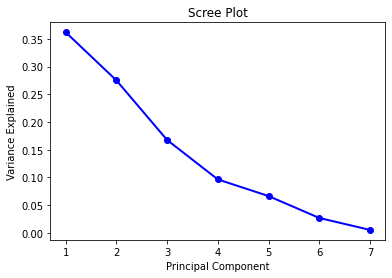

[0.36175387 0.27504796 0.16756549 0.09650821 0.06653738 0.02705787
 0.00552922]


In [10]:
pca = PCA(n_components=7)
pca_fit = pca.fit(dane)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print(pca.explained_variance_ratio_)

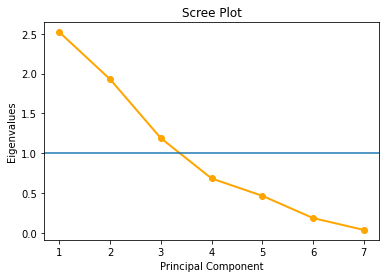

[[2.519]
 [1.928]
 [1.189]
 [0.684]
 [0.466]
 [0.187]
 [0.038]]
[[ 0.377  0.03  -0.589 -0.181 -0.664 -0.22  -0.021]
 [-0.325  0.523 -0.074 -0.003 -0.227  0.237  0.673]
 [ 0.36   0.348 -0.499 -0.261  0.56   0.358 -0.094]
 [-0.189 -0.37  -0.5    0.687  0.239 -0.002  0.237]
 [-0.194  0.572 -0.067  0.431 -0.158 -0.004 -0.626]
 [ 0.538 -0.019  0.316  0.395 -0.227  0.618  0.031]
 [ 0.51   0.373  0.21   0.293  0.244 -0.621  0.298]]


In [12]:
#Scree plot napisany ręcznie

values,vectors = eig(macierz_korelacji)
val = pd.DataFrame(values, columns=['w.wlasne']) 
val[:3] #biore 3 skladowe wiec 3 wartosci wlasne
val = val.sort_values(by='w.wlasne', ascending = False)

#zamienic wektory wlasne 6 z 5 żeby pasowały do posortowanych wartości własnych
valid_vectors = list(vectors)
valid_vectors[5] = valid_vectors[6]
valid_vectors[6] = vectors[5]

x = [1,2,3,4,5,6,7]
plt.plot(x,val,'o-', linewidth=2, color='orange')
plt.axhline(1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

val = list(np.around(np.array(val),3))
valid_vectors = list(np.around(np.array(valid_vectors),3))
print(np.array(val))
print(np.array(valid_vectors))

#val - moje wartosci wlasne
#valid_vectors - moje wektory wlasne

In [13]:
vec = pd.DataFrame(valid_vectors[:3])
Pt = vec.transpose()
index = pd.Index(list_of_columns[1:])
Pt = Pt.set_index(index)
Pt = Pt.set_axis(['PC1', 'PC2', 'PC3'], axis=1)
Pt

,PC1,PC2,PC3
calories,0.377,-0.325,0.360
protein,0.030,0.523,0.348
fat,-0.589,-0.074,-0.499
sodium*,-0.181,-0.003,-0.261
fiber,-0.664,-0.227,0.560
carbo*,-0.220,0.237,0.358
sugars,-0.021,0.673,-0.094


In [14]:
sum(pca.explained_variance_ratio_[:3]) #3 pierwsze składowe wyjaśniają 80%

0.8043673180838593

In [15]:
def column_chart(df, column):
  negative = []
  positive = []

  for element in df[column]:
    if element > 0:
      positive.append(element)
    else:
      negative.append(element)

  print(positive)
  print(negative)
  
  x = range(7)
  fig = plt.figure()
  ax = plt.subplot(111)
  ax.bar(x, negative, width=1, color='r')
  ax.bar(x, positive, width=1, color='b')

In [16]:
macierz_T = np.dot(dane,Pt) 

In [17]:
T_matrix = pd.DataFrame(macierz_T)
T_matrix = T_matrix.set_axis([cereals])
T_matrix = T_matrix.set_axis(['PC1', 'PC2', 'PC3'], axis=1)
T_matrix

,PC1,PC2,PC3
name,,,
Bran Chex,-1.784370,-0.110291,-0.220545
Bran Flakes,-1.730775,0.450883,1.293470
Cap'n'Crunch,0.233903,-0.134347,-0.997023
Cinnamon Toast Crunch,-0.225389,-0.834037,-1.557223
Clusters,-0.647477,0.269962,0.313510
Cocoa Puffs,0.471829,0.511846,-0.804475
Corn Chex,1.379128,-1.150480,-1.129221
Corn Flakes,0.364703,-1.030922,-1.322759
Corn Pops,0.982245,0.172904,0.210560


In [20]:
def print_plots(P1,P2):

  figure = plt.figure(figsize = (10,10))
  plt.scatter(T_matrix[P1],T_matrix[P2], s = 20)
  plt.xlabel(P1)
  plt.ylabel(P2)
  for i in range(1,31):
    plt.text(T_matrix[P1][i-1], T_matrix[P2][i-1], i)

  plt.show()

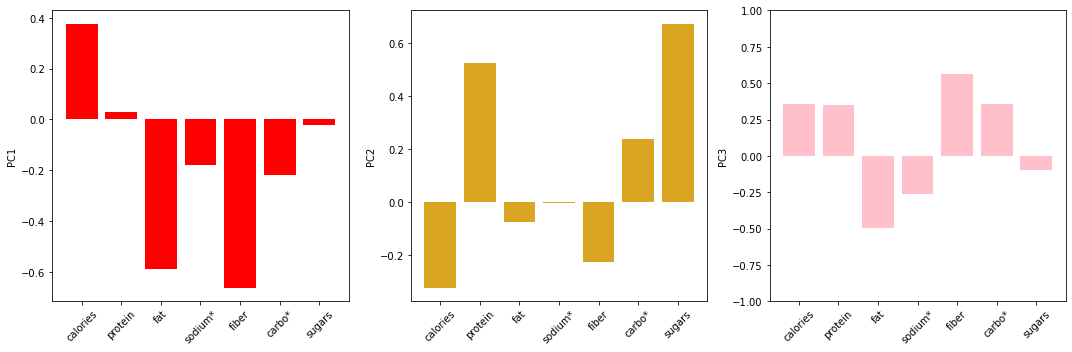

In [ ]:
xlabels=list_of_columns[1:]

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].bar(range(7), Pt['PC1'], align='center',color='red')
ax[1].bar(range(7), Pt['PC2'], align='center',color='goldenrod')
ax[2].bar(range(7), Pt['PC3'], align='center',color='pink')

ax[0].set_ylabel('PC1')
ax[1].set_ylabel('PC2')
ax[2].set_ylabel('PC3')

ax[0].set_xticks(range(7))
ax[1].set_xticks(range(7))
ax[2].set_xticks(range(7))

ax[0].set_xticklabels(xlabels, rotation=45)
ax[1].set_xticklabels(xlabels, rotation=45)
ax[2].set_xticklabels(xlabels, rotation=45)

plt.ylim([-1,1])
plt.tight_layout()

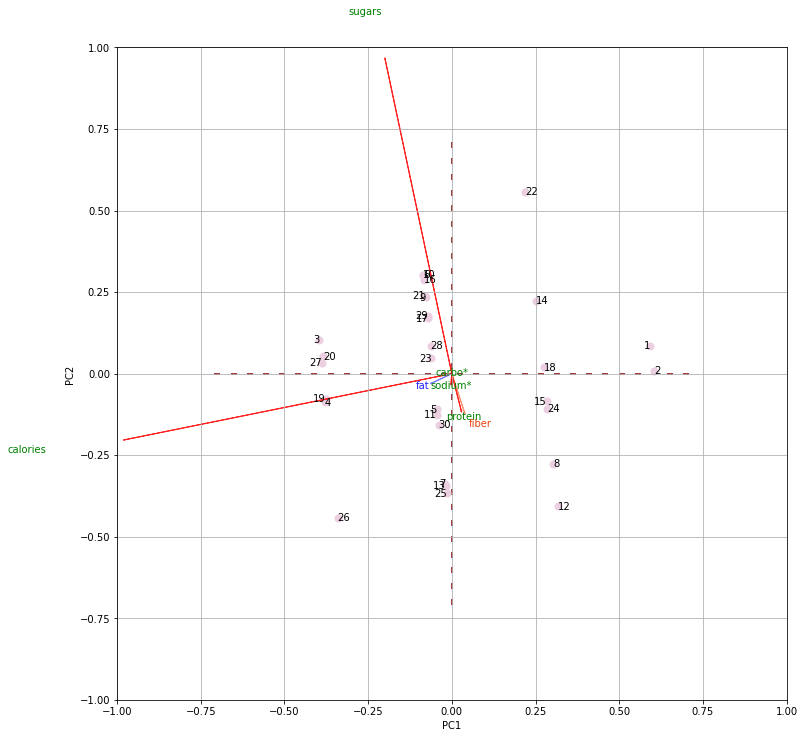

In [ ]:
dane = pd.read_excel(r'/content/dane_do_analizy.xlsx', sheet_name = 'dane_trans')

cereals = dane['name']
dane.drop('name', inplace=True, axis=1)
dane = dane.set_axis([cereals])

y = len(list_of_columns[1:])
X = np.array(dane) 
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=50,color='#ecd0e2')
    x_coord = xs*scalex
    y_coord = ys*scaley
    for i in range(n):

        if i == 2:
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = '#1e1fff',alpha = 0.5)
            plt.text(coeff[i,0]* 1.80, coeff[i,1] * 1.30, labels[i], color = '#1e1fff', ha = 'left', va = 'center')
        
        elif i == 4:
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = '#ed460f',alpha = 0.5)
            plt.text(coeff[i,0]* 1.30, coeff[i,1] * 1.30, labels[i], color = '#ed460f', ha = 'left', va = 'center')
            
        else:
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8)
            plt.text(coeff[i,0]* 1.30, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    for i in range(0,len(score)):

      if i % 2 == 0:
          plt.text(x_coord[i] + 0, y_coord[i], i+1,color = 'k',ha = 'right', va = 'center',size = 10) #numerki przy punktach
      else: 
          plt.text(x_coord[i] + 0, y_coord[i], i+1,color = 'k',ha = 'left', va = 'center',size = 10) #numerki przy punktach

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize = (12,12))
x = np.linspace(start = -0.7,stop = 0.7, num = 30)
plt.scatter(x,[0]*len(x),marker='_',color='maroon')
plt.scatter([0]*len(x),x,marker='|',color='maroon')

myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),list_of_columns[1:]) #PC1 i PC2
plt.show()

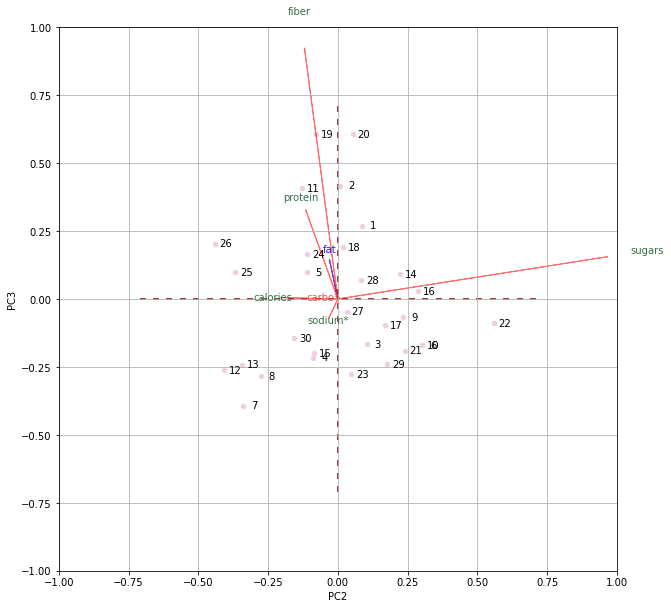

In [ ]:
dane = pd.read_excel(r'/content/dane_do_analizy.xlsx', sheet_name = 'dane_trans')

cereals = dane['name']
dane.drop('name', inplace=True, axis=1)
dane = dane.set_axis([cereals])

y = len(list_of_columns[1:])
X = np.array(dane) 
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=20,color='#ecd0e2')
    x_coord = xs*scalex
    y_coord = ys*scaley
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)

        if i == 2:

            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = '#1e1fff',alpha = 0.5)
            plt.text(coeff[i,0]* 1.80, coeff[i,1] * 1.30, labels[i], color = '#1e1fff', ha = 'left', va = 'center')

        elif i == 5:

            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = '#b97048',alpha = 0.5)
            plt.text(coeff[i,0]* 1.80, coeff[i,1] * 2, labels[i], color = '#b97048', ha = 'right', va = 'center')

        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#397048', ha = 'center', va = 'center')
    
    for i in range(0,len(score)):
      plt.text(x_coord[i] + 0.040, y_coord[i], i+1,color = 'k',ha = 'center', va = 'center')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(2))
    plt.ylabel("PC{}".format(3))
    plt.grid()

plt.figure(figsize = (10,10))
x = np.linspace(start = -0.7,stop = 0.7, num = 30)
plt.scatter(x,[0]*len(x),marker='_',color='maroon')
plt.scatter([0]*len(x),x,marker='|',color='maroon')

myplot(x_new[:,1:3],np.transpose(pca.components_[1:3, :]),list_of_columns[1:]) #PC2 i PC3
plt.show()

Bran Chex
Bran Flakes
Cap'n'Crunch
Cinnamon Toast Crunch
Clusters
Cocoa Puffs
Corn Chex
Corn Flakes
Corn Pops
Count Chocula
Cracklin' Oat Bran
Cream of Wheat (Quick)
Crispix
Crispy Wheat & Raisins
Double Chex
Froot Loops
Frosted Flakes
Frosted Mini-Wheats
Fruit & Fibre Dates; Walnuts; and Oats
Fruitful Bran
Fruity Pebbles
Golden Crisp
Golden Grahams
Grape Nuts Flakes
Grape-Nuts
Great Grains Pecan
Honey Graham Ohs
Honey Nut Cheerios
Honey-comb
Just Right Crunchy  Nuggets


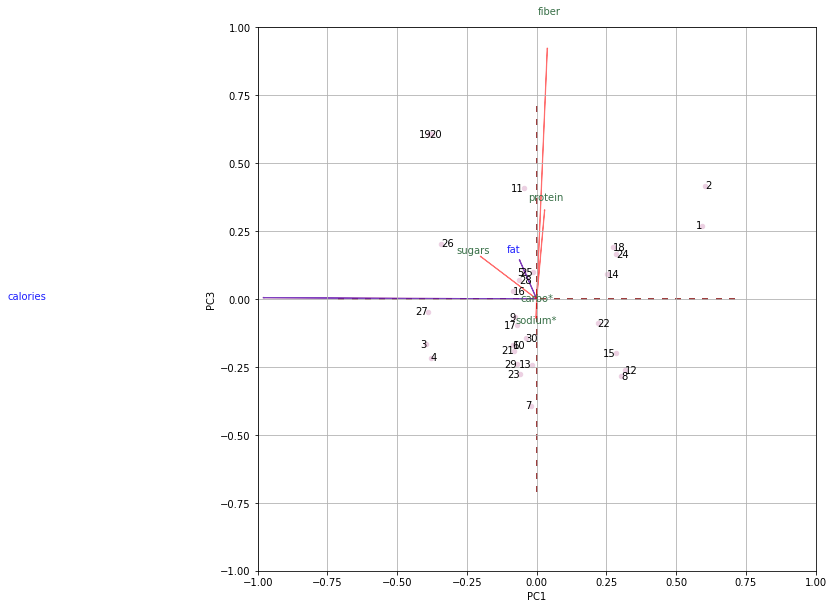

In [ ]:
dane = pd.read_excel(r'/content/dane_do_analizy.xlsx', sheet_name = 'dane_trans')

cereals = dane['name']
dane.drop('name', inplace=True, axis=1)
dane = dane.set_axis([cereals])

y = len(list_of_columns[1:])
X = np.array(dane) 
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=20,color='#ecd0e2')
    x_coord = xs*scalex
    y_coord = ys*scaley
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)

        if i == 2:

            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = '#1e1fff',alpha = 0.5)
            plt.text(coeff[i,0]* 1.80, coeff[i,1] * 1.30, labels[i], color = '#1e1fff', ha = 'left', va = 'center')

        elif i == 0:

            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = '#1e1fff',alpha = 0.5)
            plt.text(coeff[i,0]* 1.80, coeff[i,1] * 2, labels[i], color = '#1e1fff', ha = 'right', va = 'center')

        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#397048', ha = 'center', va = 'center')

    for i in range(0,len(score)):
      print((cereals[i]))
      if i % 2 == 0:
          plt.text(x_coord[i] + 0, y_coord[i], i+1,color = 'k',ha = 'right', va = 'center',size = 10) #numerki przy punktach
      else: 
          plt.text(x_coord[i] + 0, y_coord[i], i+1,color = 'k',ha = 'left', va = 'center',size = 10) #numerki przy punktach

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(3))
    plt.grid()

plt.figure(figsize = (10,10))
x = np.linspace(start = -0.7,stop = 0.7, num = 30)
plt.scatter(x,[0]*len(x),marker='_',color='maroon')
plt.scatter([0]*len(x),x,marker='|',color='maroon')


myplot(x_new[:,0:3:2],np.transpose(pca.components_[0:3:2, :]),list_of_columns[1:]) #PC1 i PC3
plt.show()